<a href="https://colab.research.google.com/github/nouranali/Agriola/blob/main/veiwpng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2

In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
!curl https://sdk.cloud.google.com | bash

Streaming output truncated to the last 5000 lines.
google-cloud-sdk/lib/surface/kuberun/core/services/list.py
google-cloud-sdk/lib/surface/kuberun/core/services/update.py
google-cloud-sdk/lib/surface/kuberun/core/services/update_traffic.py
google-cloud-sdk/lib/surface/kuberun/core/sources/__init__.py
google-cloud-sdk/lib/surface/kuberun/core/sources/list_types.py
google-cloud-sdk/lib/surface/kuberun/core/triggers/__init__.py
google-cloud-sdk/lib/surface/kuberun/core/triggers/create.py
google-cloud-sdk/lib/surface/kuberun/core/triggers/delete.py
google-cloud-sdk/lib/surface/kuberun/core/triggers/describe.py
google-cloud-sdk/lib/surface/kuberun/core/triggers/list.py
google-cloud-sdk/lib/surface/kuberun/deploy.py
google-cloud-sdk/lib/surface/kuberun/devkits/__init__.py
google-cloud-sdk/lib/surface/kuberun/devkits/describe.py
google-cloud-sdk/lib/surface/kuberun/devkits/list.py
google-cloud-sdk/lib/surface/kuberun/environments/__init__.py
google-cloud-sdk/lib/surface/kuberun/environments/l

In [ ]:
!gcloud init

In [45]:
!gsutil cp gs://fyonkagp/20170328T083601_20170328T084228_T35RNK.tif .

Copying gs://fyonkagp/20170328T083601_20170328T084228_T35RNK.tif...
| [1 files][441.6 MiB/441.6 MiB]                                                
Operation completed over 1 objects/441.6 MiB.                                    


In [47]:
img= cv2.imread('/content/sent.tif',cv2.IMREAD_COLOR)

In [17]:
from osgeo import gdal, ogr

In [55]:
x=gdal.Open(r'/content/sent.tif')

In [56]:
x.RasterCount

21

In [57]:
x.RasterXSize

3661

In [58]:
x.RasterYSize

3661

In [62]:
band=x.GetRasterBand(1)

In [63]:
band

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7efd213a1300> >

In [59]:
x.GetRasterBand

<bound method Dataset.GetRasterBand of <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7efd2a578ae0> >>

In [24]:
x.GetMetadata()

{'AREA_OR_POINT': 'Area'}

In [52]:
ds = gdal.Translate('/content/sent.png', '/content/sent.tif', format='PNG', outputType=gdal.GDT_Byte, scaleParams=[[0,1]])

In [53]:
tst=cv2.imread('/content/sent.png')

TypeError: ignored

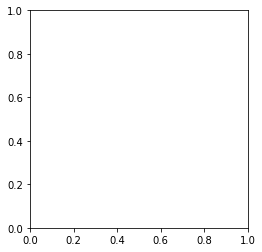

In [54]:
plt.imshow(tst)

In [ ]:
!pip install rasterio

In [33]:
import rasterio
import numpy as np
from skimage import exposure

In [37]:
with rasterio.open('/content/3.tif', 'r') as f:
    red, green, blue = f.read(3), f.read(2), f.read(1)
    red[red == -999999] = 0
    green[green == -999999] = 0
    blue[blue == -999999] = 0
    rgb = np.dstack((red, green, blue))

# Some of my images have NaNs for NoData so I have to remove them when creating the histogram
shape = rgb.shape
rgb_vector = rgb.reshape([rgb.shape[0] * rgb.shape[1], rgb.shape[2]])
rgb_vector = rgb_vector[~np.isnan(rgb_vector).any(axis=1)]

# View histogram of RGB values
fig = plt.figure(figsize=(10, 7))
fig.set_facecolor('white')
for color, channel in zip('rgb_vector', np.rollaxis(rgb, axis=-1)):
    counts, centers = np.isfinite(exposure.histogram(channel))
    plt.plot(centers[1::], counts[1::], color=color)
plt.show()

# Get cutoff values based on standard deviations. Ideally these would be on either side of each histogram peak and cutoff the tail. 
lims = []
for i in range(3):
    x = np.mean(rgb_vector[:, i])
    sd = np.std(rgb_vector[:, i])
    low = x-(1.75*sd)  # Adjust the coefficient here if the image doesn't look right
    high = x + (1.75 * sd)  # Adjust the coefficient here if the image doesn't look right
    if low < 0:
        low = 0
    if high > 1:
        high = 1
    lims.append((low, high))
r = exposure.rescale_intensity(rgb[:, :, 0], in_range=lims[0])
g = exposure.rescale_intensity(rgb[:, :, 1], in_range=lims[1])
b = exposure.rescale_intensity(rgb[:, :, 2], in_range=lims[2])
rgb_enhanced = np.dstack((r, g, b))
plt.imshow(rgb_enhanced)


ValueError: ignored

<Figure size 720x504 with 0 Axes>